# Iris Dataset

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the excel files

data= pd.read_excel(r"C:\Users\Ash\Desktop\Data Trained\Projects\Project 3 - Sales Channel + Diabetes/iris.xlsx")

In [3]:
# check the first five sample data 

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# check the shapes of both the dataset

print(data.shape)

(150, 5)


In [5]:
#check the info of the data dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
# checking the null values

data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### EDA

In [7]:
# Statistical Analysis

data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


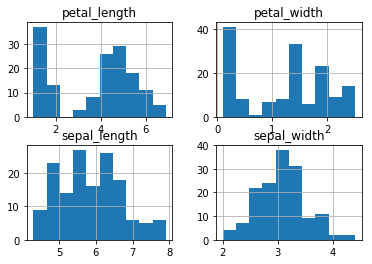

In [8]:
# Univariate Analysis

data.hist()
plt.show()

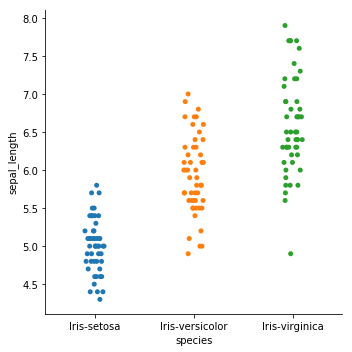

In [9]:
# Bivariate Analysis

sns.catplot(x='species',y='sepal_length',data=data)

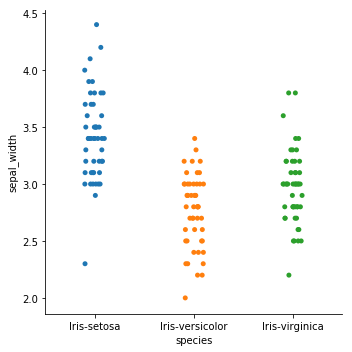

In [10]:
sns.catplot(x='species',y='sepal_width',data=data)

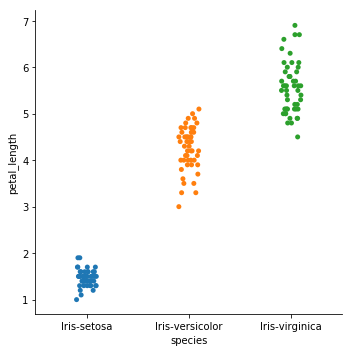

In [11]:
sns.catplot(x='species',y='petal_length',data=data)

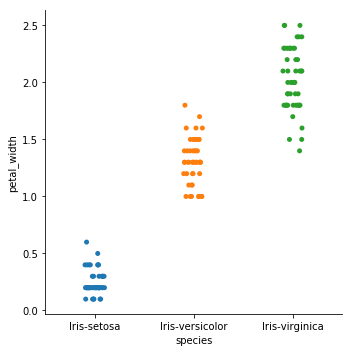

In [12]:
sns.catplot(x='species',y='petal_width',data=data)

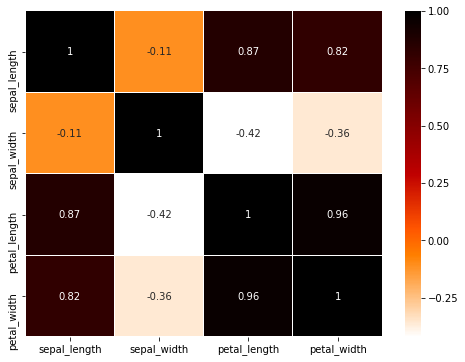

In [13]:
#check the correlation

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),cmap='gist_heat_r',linewidths=0.1,linecolor='w',annot=True)

##### By this we can clearly observe that there is a high correlation between all the features.

In [14]:
X = data.drop('species',axis =1)
y = data['species']

In [15]:
# segregating the train and test set

from sklearn.model_selection import train_test_split,KFold, cross_val_score

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.33,random_state=42,stratify=y)

### Implementing all the models

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [17]:
# appending all the models in a list

models = []
results = []
names = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=22)))
models.append(('DT',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RFC',RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr',
            n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
            tol=0.0001, verbose=0, warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=22, p=2,
             weights='uniform')),
 ('DT',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('RFC',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              m

In [18]:
# Fitting all the models on the training set

for name,model in models:
    k_fold = KFold(n_splits=10,random_state=42)
    cv_score = cross_val_score(model,train_X,y=train_y,scoring='accuracy',cv=k_fold)
    results.append(cv_score)
    names.append(name)
    print('%s %.2f (%.2f)' % (name,(cv_score.mean()*100),(cv_score.std()*100)))

LR 94.00 (6.63)
KNN 96.00 (4.90)
DT 94.00 (6.63)
NB 98.00 (4.00)
RFC 95.00 (6.71)
SVM 97.00 (4.58)


In [19]:
#Since Logistic Regression is the best fitted model

rfc=RandomForestClassifier(max_depth=5)
rfc.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
rfc_predicted = rfc.predict(test_X)
rfc_predicted

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)

In [21]:
#checking the accuracy of the model on the test data

rfc_score = accuracy_score(test_y,rfc_predicted)
print('Accuracy of the model : %.2f' % (rfc_score*100))

print('Classifiction report :')
print(classification_report(test_y,rfc_predicted))

print('confusion matrix :')
print(confusion_matrix(test_y,rfc_predicted))

Accuracy of the model : 92.00
Classifiction report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.84      0.94      0.89        17
 Iris-virginica       0.93      0.82      0.87        17

      micro avg       0.92      0.92      0.92        50
      macro avg       0.93      0.92      0.92        50
   weighted avg       0.92      0.92      0.92        50

confusion matrix :
[[16  0  0]
 [ 0 16  1]
 [ 0  3 14]]
